# Salmon price volatility analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

from model import ARMA_GARCH

import sys
sys.path.append("..")
from utils import *

## Data Loading and Model Creation

In [2]:
data_URL ='https://www.ssb.no/statbank/sq/10086365'

salmon_data = import_salmon_data(data_URL, rename_cols=True)

com_data = yf.download(['ZW=F', 'ZS=F', 'HE=F'],
    start=salmon_data.index[0], 
    end=salmon_data.index[-1], 
    interval='1wk', 
    progress=False
)['Adj Close']


models = {
    'Fresh salmon': ARMA_GARCH(salmon_data['Price']),
    'Pork': ARMA_GARCH(com_data['HE=F']),
    'Wheat': ARMA_GARCH(com_data['ZW=F']),
    'Soybean': ARMA_GARCH(com_data['ZS=F']),
}


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6968.906, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7056.046, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7025.163, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7003.455, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7054.419, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6971.052, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6967.108, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6984.481, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6967.789, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6967.901, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6966.833, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=6968.741, Time=0.20 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6969.753, Time=0.72 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6965.215, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]          

## Conditional volatility plot

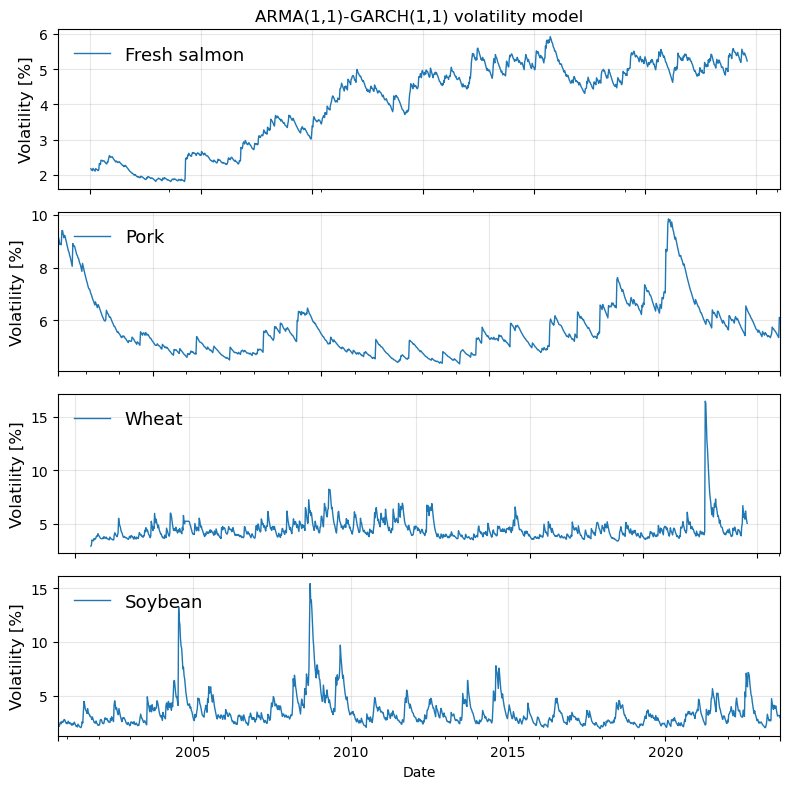

In [3]:

markets = ['fresh salmon market', 'Pork futures', 'wheat futures', 'soybean futures']

fig, axs = plt.subplots(len(models.keys()), figsize=(8, 8))

for i, (model, key) in enumerate(zip(models.values(), models.keys())):
    model.conditional_volatility.plot(
        ax=axs[i], 
        linewidth=1, 
        sharex = axs[0],
        label=key
    )

    axs[i].set_ylabel('Volatility [%]', fontsize=12)
    axs[i].grid(alpha=0.3)
    axs[i].legend(fontsize=13, frameon=False, loc='upper left')

fig.subplots_adjust(wspace=0)
axs[0].set_title('ARMA(1,1)-GARCH(1,1) volatility model', fontsize=12)
axs[0].set_xlabel('Date', fontsize=12)
fig.tight_layout()

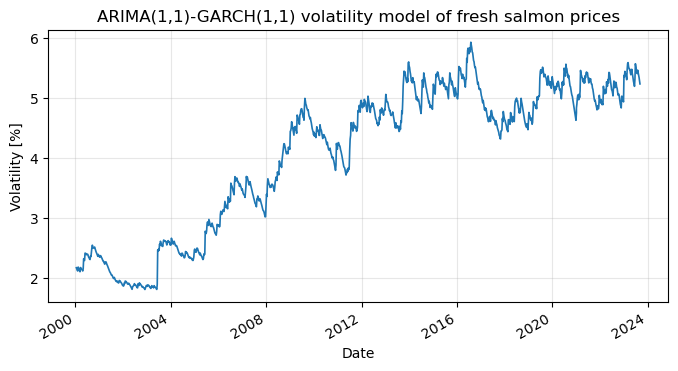

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))

models['Fresh salmon'].conditional_volatility.plot(
        linewidth=1.2, 
)

ax.grid(alpha=0.3)
ax.set_title('ARIMA(1,1)-GARCH(1,1) volatility model of fresh salmon prices')
ax.set_ylabel('Volatility [%]')
ax.set_xlabel('Date')

fig.savefig('Vol_model.png', dpi=200)

## Volatility spikes distribution

Soybean:
mu: 0.0843, std: 3.7000
Wheat:
mu: 0.0645, std: 4.5464


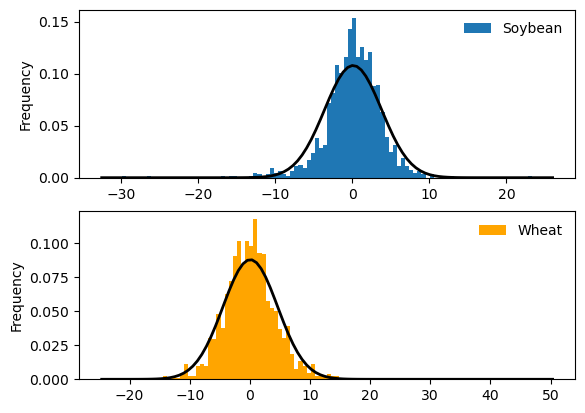

In [5]:
fig, axs = plt.subplots(2)

models['Soybean'].log_yield.plot(kind='hist', bins=100, ax=axs[0], density=True, label='Soybean')
mu, std = norm.fit(models['Soybean'].log_yield)
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].legend(frameon=False)

print('Soybean:')
print(f'mu: {mu:.4f}, std: {std:.4f}')

models['Wheat'].log_yield.plot(kind='hist', bins=100, ax=axs[1], density=True, label='Wheat', color='orange')
mu, std = norm.fit(models['Wheat'].log_yield)
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[1].plot(x, p, 'k', linewidth=2)
axs[1].legend(frameon=False)

print('Wheat:')
print(f'mu: {mu:.4f}, std: {std:.4f}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10464.668, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10753.587, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10688.212, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10578.104, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10751.664, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10472.253, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10465.069, Time=0.47 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=10437.872, Time=0.97 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10447.567, Time=0.54 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=10442.046, Time=1.01 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=10441.001, Time=1.13 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=10443.691, Time=1.04 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=10441.277, Time=0.73 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=10435.214, Time=1.25 sec
 ARIMA(5,0,3)(0,0,0

<Axes: xlabel='Date'>

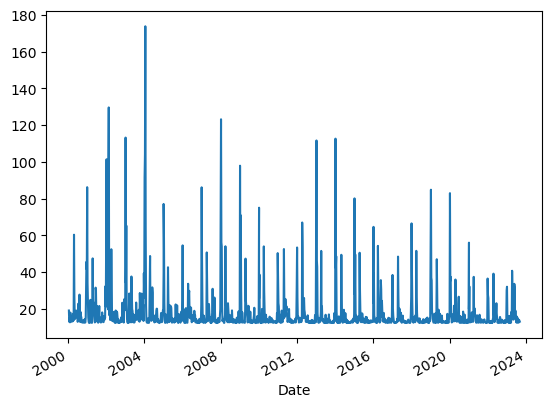

In [6]:
volume_model = ARMA_GARCH(salmon_data['Volume'])

volume_model.conditional_volatility.plot()